In [1]:
import game

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import agent

In [2]:
def visualize(stateHistory, actionHistory, rewardHistory, N):
    inventory = stateHistory[:, 0, :]
    orders = actionHistory[:, 1, :]
    serviceTimes = actionHistory[:, 0, :]
    reorderPoints = stateHistory[:, 1, :]
    
    print("Time Series")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        
        alpha = 1 if i == 2 else 0.3
#         plt.step(range(N+1), inventory[:, i] * np.roll(np.sign(orders[:, i]), -1), label="inventory")        
        plt.plot(range(N+1), inventory[:, i], label="inventory", alpha=alpha, c='b', linestyle='--', drawstyle='steps')
        plt.step(range(N+1), orders[:, i], label="order quantity", c='orange')
        if i == 2:
            plt.step(range(N+1), reorderPoints[:, i], label="reorder point", c='green')
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Service Time")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), serviceTimes[:, i], label="service time")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    
    print("Inventory")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), inventory[:, i] * np.sign(orders[:, i]), label="inventory")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Rewards")
    plt.figure(figsize=(20, 4))
    plt.step(range(N+1), rewardHistory)
    plt.show()

In [3]:
learningParams = {
    "gamma": 0.2,
    "alpha": 1,
    "epsilon": 0.5
}

envParams = {
    "inventoryCost": [100, 5, 100],
    "muDemand": 2,
    "stdDemand": 0, #0.1, #1,
    "retailerOrder": 10,
    "stockoutCost": 10000,
    "N": 100
}

In [4]:
# create central planner
plannerAgent = agent.Planner(learningParams, envParams["retailerOrder"])

Time Series


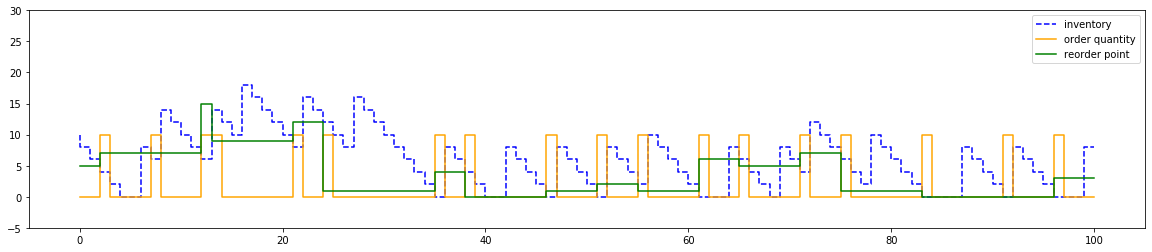

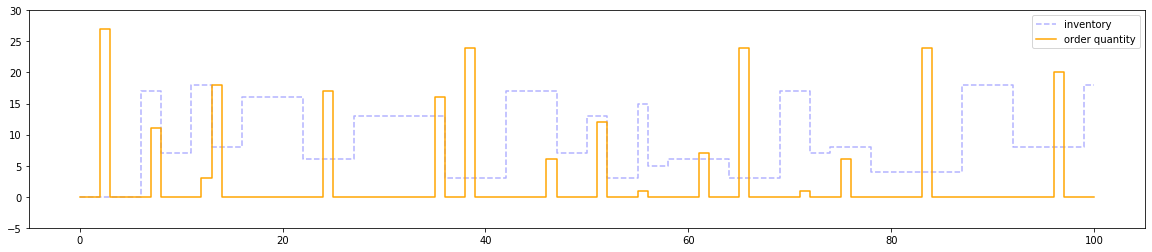

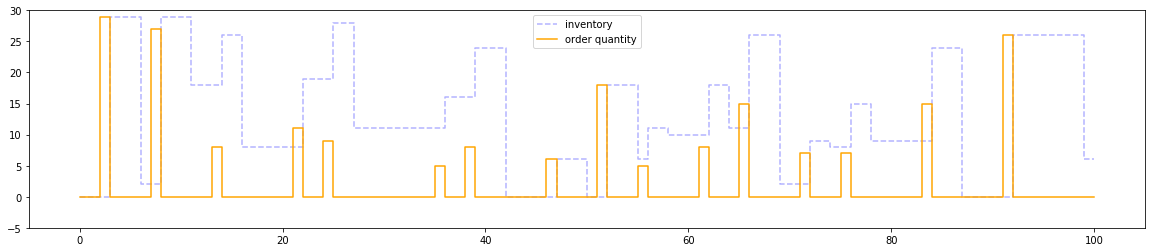

Service Time


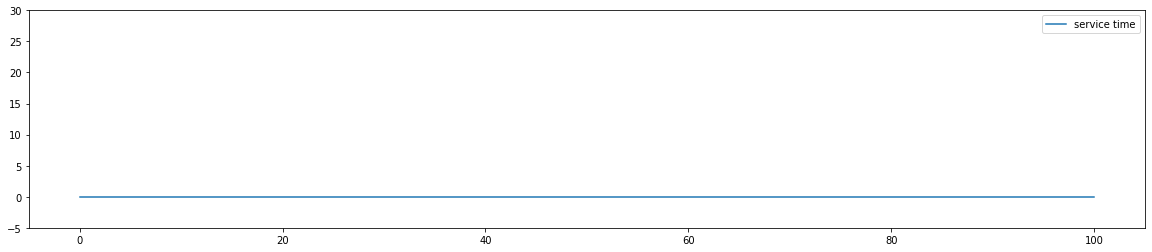

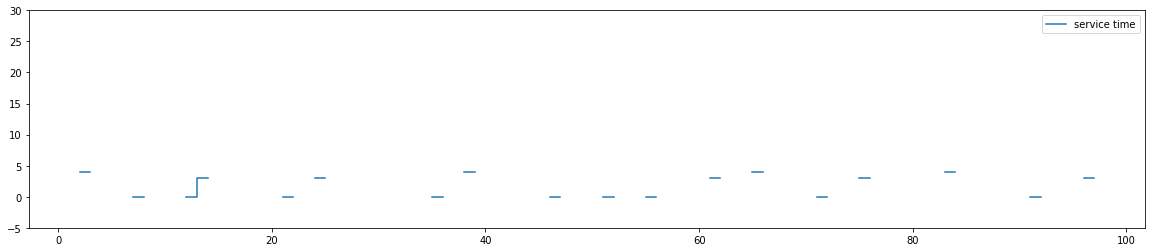

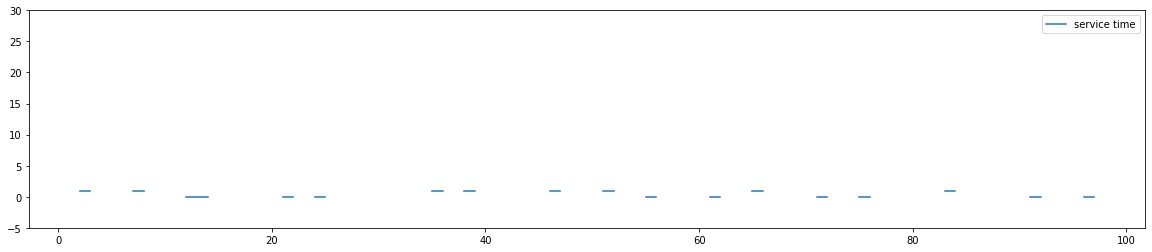

Inventory


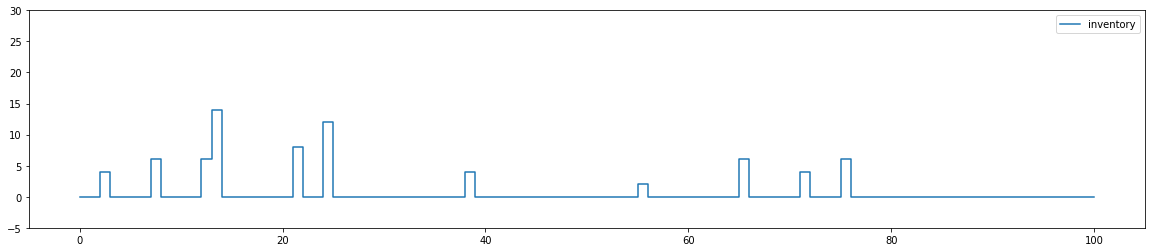

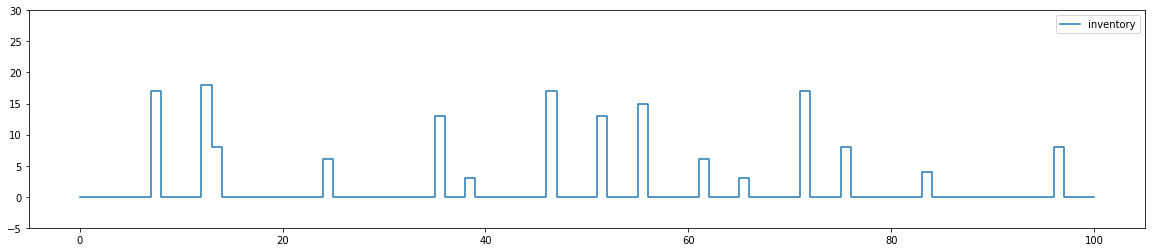

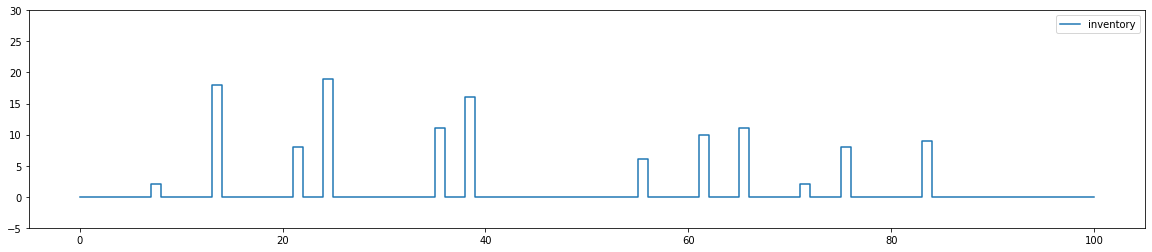

Rewards


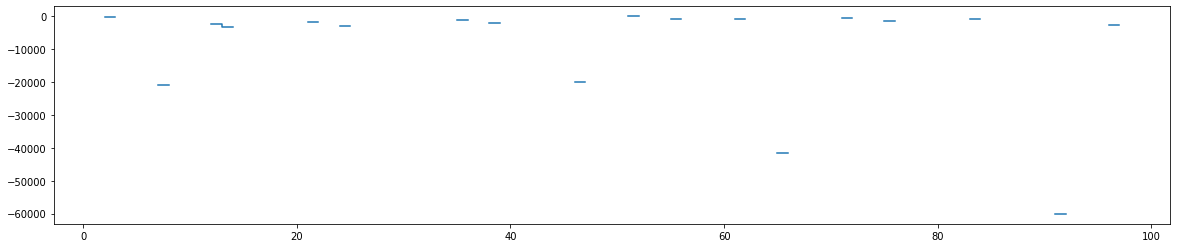

In [5]:
# play the game while training
stateHistory, actionHistory, rewardHistory = game.runEpisode(envParams, plannerAgent, train=True)

visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

In [6]:
for _ in tqdm(range(5000)):
# play the game while training
    game.runEpisode(envParams, plannerAgent, train=True)

100%|██████████| 5000/5000 [00:28<00:00, 174.06it/s]


Time Series


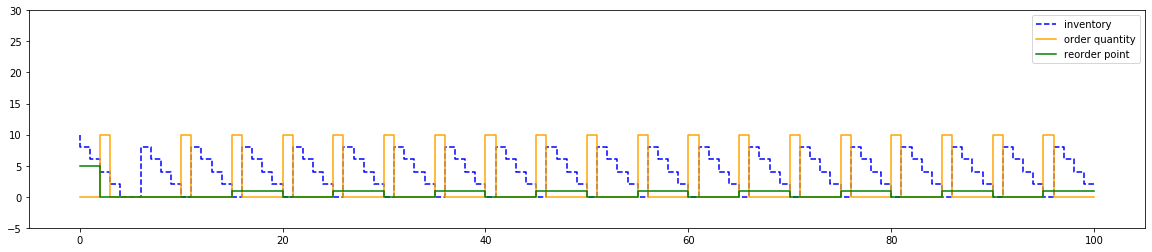

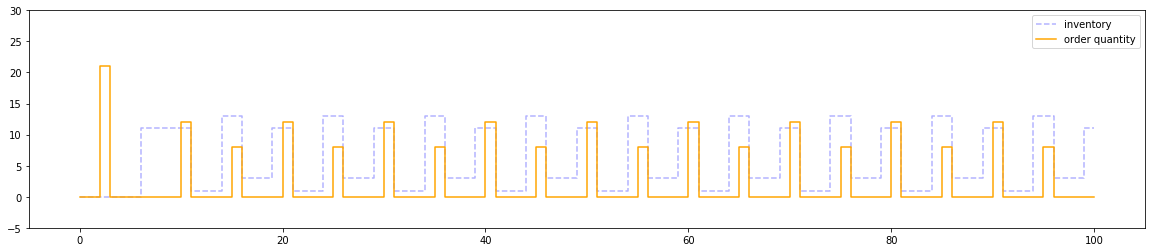

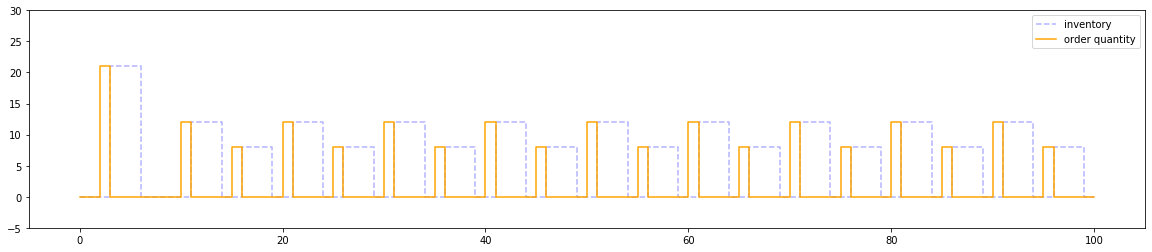

Service Time


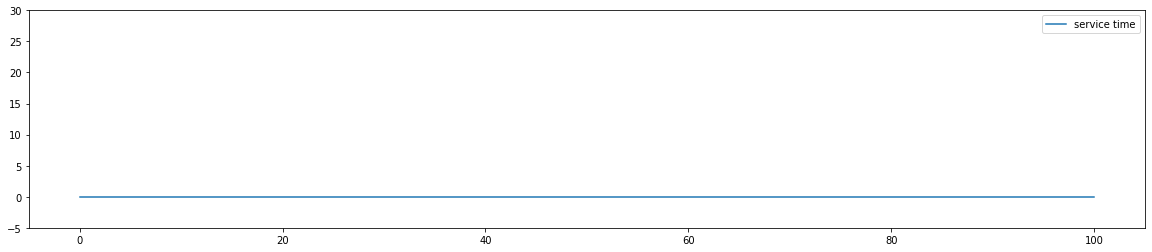

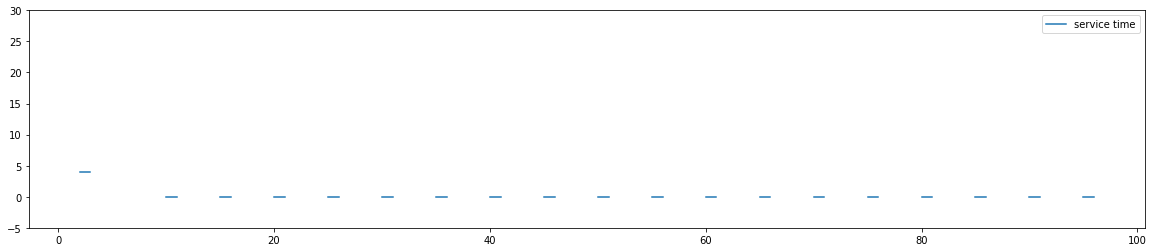

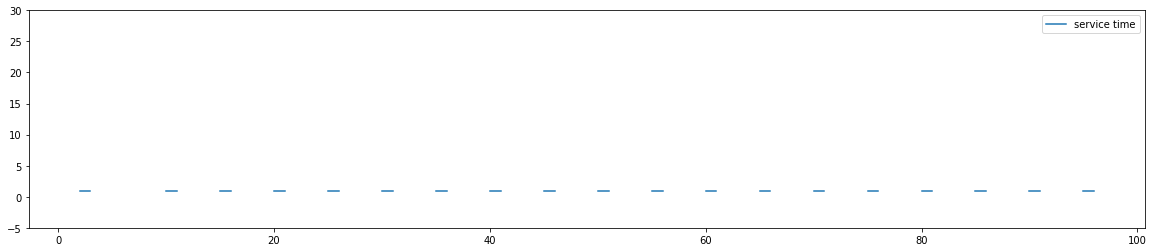

Inventory


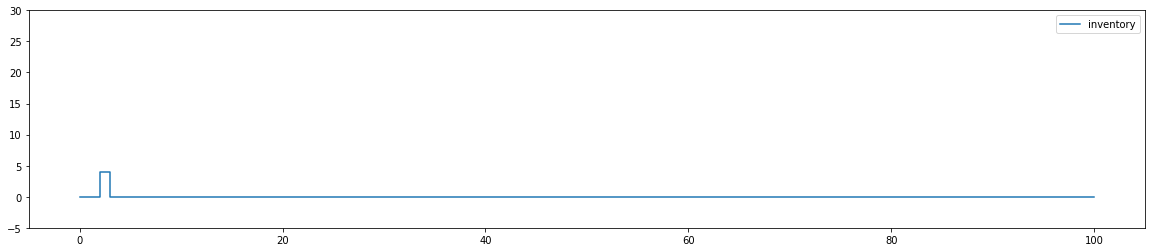

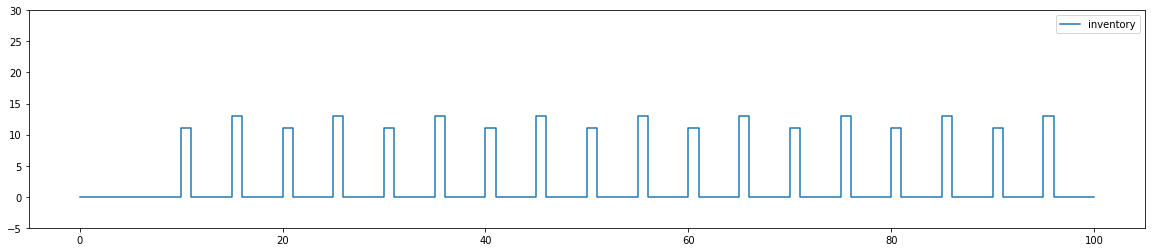

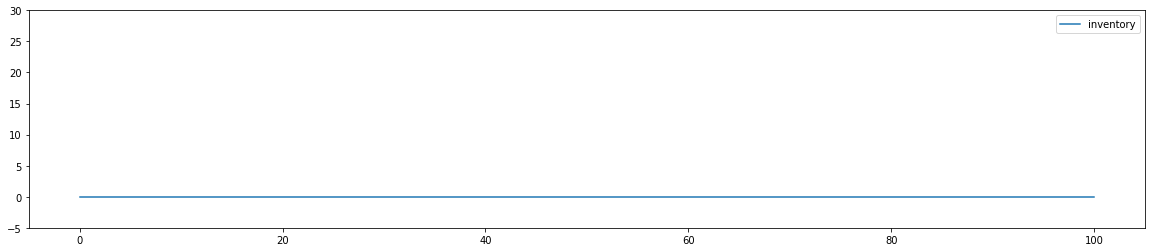

Rewards


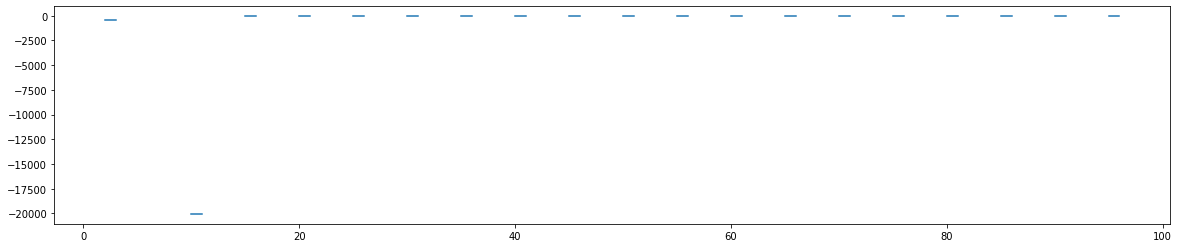

In [7]:
# play the game while training
plannerAgent.epsilon = 0

stateHistory, actionHistory, rewardHistory = game.runEpisode(envParams, plannerAgent, train=False)
visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

In [8]:
# X = []
# Y = []
# size = []

# minVal = min(plannerAgent.q.obj['0_0'].values())

# for k, v in plannerAgent.q.obj['0_0'].items():
#     x, y = k.split("_")
#     X.append(float(x))
#     Y.append(float(y))
    
#     s = int(v - minVal)
#     size.append(s)
    
# plt.figure(figsize=(10, 10))
# plt.scatter(X, Y, s=size, alpha=0.3)

In [9]:
plannerAgent.q.obj

# there's a bias here. whenever that state is trained, it's always reordering
# need to think of state, action again

{'2_17_6': {'27.0_11.0_10.0_7.0': -2490.0,
  '26.0_10.0_10.0_2.0': -2749.32,
  '5.0_0.0_10.0_7.0': -1835.16,
  '11.0_3.0_10.0_2.0': -1444.8222279679999,
  '22.0_0.0_10.0_12.0': -3635.0,
  '0.0_0.0_10.0_2.0': -8629.0,
  '10.0_0.0_10.0_0.0': -13498.2,
  '14.0_0.0_10.0_15.0': -3312.2048,
  '11.0_3.0_10.0_13.0': -3218.76,
  '27.0_9.0_10.0_2.0': -2280.0,
  '2.0_0.0_10.0_8.0': -1490.248,
  '27.0_4.0_10.0_14.0': -4635.5408899072,
  '17.0_12.0_10.0_3.0': -1024.364,
  '24.0_0.0_10.0_7.0': -3656.0816,
  '0.0_0.0_10.0_12.0': -3534.6320000000005,
  '16.0_0.0_10.0_0.0': -10035.53952,
  '16.0_8.0_10.0_8.0': -1875.0,
  '27.0_2.0_10.0_14.0': -4635.008,
  '10.0_10.0_10.0_14.0': -3128.02816,
  '12.0_1.0_10.0_14.0': -3392.44,
  '26.0_0.0_10.0_12.0': -4394.032,
  '27.0_12.0_10.0_6.0': -2395.0,
  '18.0_12.0_10.0_13.0': -4024.4,
  '24.0_0.0_10.0_3.0': -7402.9481779814405,
  '0.0_0.0_10.0_9.0': -1296.0,
  '26.0_9.0_10.0_11.0': -4149.88,
  '19.0_10.0_10.0_6.0': -1933.1452056522805,
  '11.0_4.0_10.0_8.0': -197